# Sintetizando Imagens Criando Bandeiras
Notebook baseado em um vídeo aula do Programação Dinâmica: https://www.youtube.com/watch?v=kb8S06dpZiM&t=207s

#### 1. Criando uma imagem

In [1]:
from PIL import Image

In [2]:
image = Image.new('RGB',(100, 100))  #image.show() #Função para abrir uma imagem pelo SO em um .py

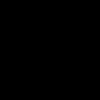

In [3]:
image

#### 2. Criando uma imagem com cor

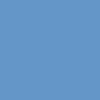

In [4]:
image = Image.new('RGB',(100, 100), (100,150,200))
image

#### 3. Modificando as cores dos pixels 

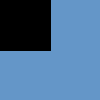

In [5]:
image = Image.new('RGB',(100, 100), (100,150,200))

for i in range(51):
    for j in range(51):
        image.putpixel((i,j), (0,0,0))
        
image

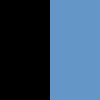

In [6]:
image = Image.new('RGB',(100, 100), (100,150,200))

for i in range(50):
    for j in range(100):
        image.putpixel((i,j), (0,0,0))
        
image

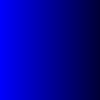

In [7]:
blue = 255
image = Image.new('RGB',(100, 100), (0,0,blue))

for i in range(100):
    blue-=2
    for j in range(100):
        image.putpixel((i,j), (0,0,blue))

image

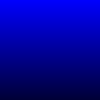

In [8]:
blue = 255
image = Image.new('RGB',(100, 100), (0,0,blue))

for i in range(100):
    blue = 255
    for j in range(100):
        blue-=2
        image.putpixel((i,j), (0,0,blue))

image

#### 4. Criando uma função geradora de imagem (triângulo)

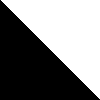

In [9]:
def create_triagle(height):
    image = Image.new('RGB', (height, height))
    
    for y in range(height):
        for x in range(height):
            if x < y :
                image.putpixel((y,x), (255,255,255))
    
    return image

create_triagle(100)

#### 5. Criando uma função gedora de imagem (bandeiras)
##### 5.1 França

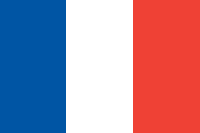

In [10]:
def create_france_flag(width):
    height = (width*2)//3
    image = Image.new('RGB',(width,height))
    
    # parte azul
    for x in range(width//3):
        for y in range(height):
            image.putpixel((x,y), (0, 85, 164))
            
    # parte branca
    for x in range(width//3,width*2//3):
        for y in range(height):
            image.putpixel((x,y), (255, 255, 255))
    
    # parte vermelha
    for x in range(width*2//3,width):
        for y in range(height):
            image.putpixel((x,y), (239, 65, 53))
            
    return image

create_france_flag(200)

##### 5.2 Japão

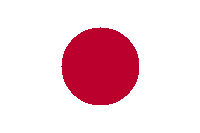

In [11]:
def create_japan_flag(width):
    height = (2*width)//3
    image = Image.new('RGB',(width,height), (255,255,255))
    
    c = (width//2, height//2)
    r = (3*height)//10
    
    for x in range(c[0]-r,c[0]+r):
        for y in range(c[1]-r,c[1]+r):
            if ((x-c[0])**2 + (y-c[1])**2) <= r**2 :
                image.putpixel((x,y), (188,0,45))
            
    return image

create_japan_flag(200)

##### 5.3 Brasil

##### Teste de conceito

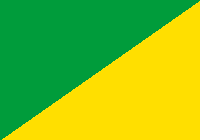

In [12]:
def teste_conceito(width):
    height = (7*width)//10
    
    green = (0,156,59)
    yellow = (255,223,0)
    
    tg = height/width
    
    image = Image.new('RGB', (width, height), green)
    
    for y in range(height):
        for x in range(width):
            try:
                if (y/x) > tg :
                    image.putpixel((width-x,y), (255,223,0))
            except ZeroDivisionError:
                pass
                
    return image

teste_conceito(200)

##### A bandeira

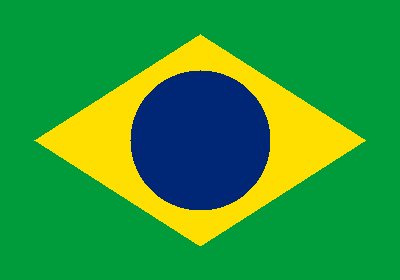

In [13]:
def create_brazil_flag(width):
    height = (7*width)//10
    
    green = (0,156,59)
    blue = (0,39,118)
    yellow = (255,223,0)
    
    center = (width//2, height//2) # centro
    ratio = height//4             # raio
    tg = height/width         # tangente
    margin = width//200*17         # margem
    
    image = Image.new('RGB', (width, height), green)
    
    # losangulo amarelo
    for x in range(margin, width - margin):
        for y in range(margin, height - margin):
            if x <= center[0]:
                if y <= center[1]:
                    if (center[1] - y) <= 0.64 * (x - margin): # 2º quadrante
                        image.putpixel((x,y), yellow)
                else:
                    if (y - center[1]) <= 0.64 * (x - margin): # 3º quadrante
                        image.putpixel((x,y), yellow)
            else:
                if y <= center[1]:
                    if (center[1] - y) <= -0.64 * (x - center[0]) + center[1] - margin: # 1º quadrante
                        image.putpixel((x,y), yellow)
                else:
                    if (y - center[1]) <= -0.64 * (x - center[0]) + center[1] - margin: # 2º quadrante
                        image.putpixel((x,y), yellow)
                
                
    # círculo azul
    for x in range(center[0]-ratio,center[0]+ratio):
        for y in range(center[1]-ratio,center[1]+ratio):
            if ((x-center[0])**2 + (y-center[1])**2) <= ratio**2 :
                image.putpixel((x,y), blue)
    
    return image

create_brazil_flag(400)